In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import random
import cv2
import warnings
import math
from tabulate import tabulate
import scipy.io as sio
sys.path.append('../')

In [2]:
from MLVcode.load_mat import load_mat
from MLVcode.drawLinedrawing import drawLinedrawing

In [3]:
filename = '../dataSets/TorontoScenes/cities_vecLD.mat'
# Given the above keys, we access 77th row of the data
data_keys = {'originalImage','imsize', 'lineMethod', 'numContours',                
            'contours', 'orientations', 'lengths',   'contourLengths',             
            'curvatures', 'junctions', 'parallelism',  'parallelismMeans',           
            'parallelism_allX', 'parallelism_allY','parallelism_allScores', 
            'parallelismBins', 'parallelismHistograms', 'parallelismNormHistograms',  
            'parallelismSumHistogram', 'parallelismNormSumHistogram',
            'separation', 'separationMeans', 'separation_allX',  'separation_allY',            
            'separation_allScores', 'separationBins',             
            'separationHistograms', 'separationNormHistograms',   
            'separationSumHistogram', 'separationNormSumHistogram', 
            'mirror', 'mirrorMeans', 'mirror_allX', 'mirror_allY',                
            'mirror_allScores', 'mirrorBins', 'mirrorHistograms', 
            'mirrorNormHistograms', 'mirrorSumHistogram', 'mirrorNormSumHistogram'}

In [4]:
data = load_mat(filename)
print(data['vecLD']['contourLengths'][0][0][76])
print(data['vecLD']['contours'][0][8].shape)
print(data['vecLD']['contourLengths'][0][1].shape)

[68.22431321]
(1, 1083)
(595, 1)


In [5]:
cute = {}
# Assign the data to the dictionary and define them with empty value
for key in data_keys:
    cute[key] = data['vecLD'][key][0][76]
print(cute['contours'][0].shape)

(476,)


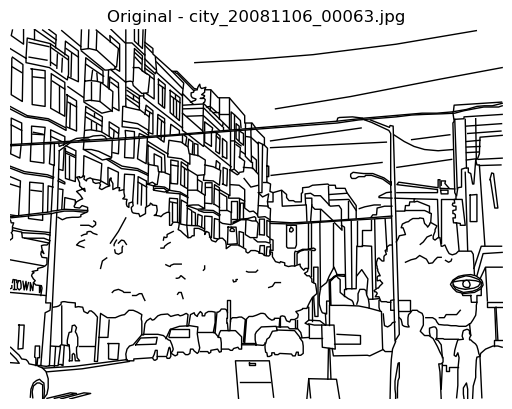

In [6]:
drawLinedrawing(cute)

In [7]:
from MLVcode.computeOrientation import computeOrientation
from MLVcode.computeLength import computeLength
from MLVcode.computeCurvature import computeCurvature
from MLVcode.computeJunctions import computeJunctions
from MLVcode.computeContourProperties import computeContourProperties

### Testing

In [8]:
# # To be worked on
# def computeJunctions(vecLD):
#     """
#     Computes all junctions between contours in the vectorized line drawing vecLD.

#     Args:
#         vecLD (LineDrawingStructure): The vectorized line drawing data structure.

#     Returns:
#         LineDrawingStructure: A vector LD of structs with junction information added.

#     Output Structure:
#         Each junction consists of the following information:
#         - contourIDs (list): Vector of IDs of contours involved in the junction.
#         - segmentIDs (list): Vector of IDs of the segments within these contours.
#         - position (list): Location of the junction [x, y].
#         - angle (float): Smallest angle of the junction.
#         - type (str): Based on the largest angle a, one of: 'T', 'Y', 'X', 'Arrow', 'Star'.

#     -----------------------------------------------------
#     This function is part of the Mid Level Vision Toolbox:
#     http://www.mlvtoolbox.org

#     Copyright Dirk Bernhardt-Walther
#     University of Toronto, Toronto, Ontario, Canada, 2022

#     Contact: dirk.walther@gmail.com
#     -----------------------------------------------------
#     """
#     if not hasattr(vecLD, 'orientations'):
#         vecLD = computeOrientation(vecLD)
#     if not hasattr(vecLD, 'lengths'):
#         vecLD = computeLength(vecLD)
    
#     # 3 Step Process

#     # 1. Detect any intersections between line segments
#     jcts = detectIntersections(vecLD) # Need to write this function

#     # 2. Merge Junctions that the close by
#     jcts = cleanupJunctions(jcts) # Need to write this function

#     # 3. Measure angles and classify junctions
#     vecLD['junctions'] = computeJunctionAnglesTypes(jcts, vecLD)    # Need to write this function

#     return vecLD


In [9]:
# import numpy as np

# def lineIntersection(query_line, ref_line, re=0.3, ae=2):
#     """
#     Determines if two line segments intersect and, if so, returns the intersection point.
    
#     Parameters:
#         query_line (list): [X1, Y1, X2, Y2] coordinates of the first line segment.
#         ref_line (list): [X1, Y1, X2, Y2] coordinates of the second line segment.
#         re (float): Relative epsilon, threshold for judging intersections (default 0.3).
#         ae (float): Absolute epsilon, threshold in pixels for judging intersections (default 2).

#     Returns:
#         np.array or None: Coordinates [x, y] of the intersection point if they intersect, otherwise None.
#     """
#     eps = 1e-4
    
#     ay = query_line[2] - query_line[0]
#     ax = query_line[3] - query_line[1]
#     # print("Term1: ", query_line[3], "Term2: ", query_line[1], "Term3: ", ax)
#     by = ref_line[2] - ref_line[0]
#     bx = ref_line[3] - ref_line[1]
#     cy = ref_line[0] - query_line[0]
#     cx = ref_line[1] - query_line[1]

#     d = ay * bx - ax * by
    
#     if d == 0:  # Lines are parallel or coincident
#         return None

#     a = (bx * cy - by * cx) / d
#     b = (ax * cy - ay * cx) / d

#     at = min(re, ae / max(abs(ax), abs(ay)))
#     bt = min(re, ae / max(abs(bx), abs(by)))

#     if (-at <= a <= 1 + at) and (-bt <= b <= 1 + bt):
#         # Check for special cases where a or b are 0 or 1
#         if abs(a) < eps:
#             return np.array(query_line[:2])
#         elif abs(a - 1) < eps:
#             return np.array(query_line[2:])
#         elif abs(b) < eps:
#             return np.array(ref_line[:2])
#         elif abs(b - 1) < eps:
#             return np.array(ref_line[2:])
#         else:
#             # General case for calculating the intersection
#             a1 = query_line[1] - query_line[3]
#             b1 = query_line[2] - query_line[0]
#             c1 = query_line[0] * query_line[3] - query_line[1] * query_line[2]

#             a2 = ref_line[1] - ref_line[3]
#             b2 = ref_line[2] - ref_line[0]
#             c2 = ref_line[0] * ref_line[3] - ref_line[1] * ref_line[2]

#             dd = a1 * b2 - a2 * b1

#             x = (b1 * c2 - b2 * c1) / dd
#             y = (a2 * c1 - a1 * c2) / dd
            
#             return np.array([x, y])
#     else:
#         return None


In [10]:
# def detectJunctions(vec_ld, ae=1, re=0.3):
#     """
#     Detects junctions between contours in the vectorized line drawing.

#     Parameters:
#         vec_ld (VectorizedLineDrawing): The vectorized line drawing containing the contours and their lengths.
#         ae (float): Absolute epsilon for detecting junctions across gaps (default: 1 pixel).
#         re (float): Relative epsilon for detecting junctions as a fraction of the line segment length (default: 0.3).

#     Returns:
#         list: A list of dictionaries, each containing:
#               - 'position': [x, y] coordinates of the junction point
#               - 'contour_ids': Indices of the contours participating in this junction
#               - 'segment_ids': Indices of the line segments within the participating contours.
#     """
#     junctions = []

#     # flag =0

#     for query_c in range(vec_ld['numContours'][0][0]):
#         if vec_ld['contourLengths'][query_c][0] < ae:  # Ignore too short curves
#             continue
        
#         query_curve = vec_ld['contours'][0][query_c]
#         for query_s in range(len(query_curve)):
#             for ref_c in range(query_c + 1, vec_ld['numContours'][0][0]):
#                 if vec_ld['contourLengths'][ref_c][0] < ae:  # Ignore too short curves
#                     continue
                
#                 ref_curve = vec_ld['contours'][0][ref_c]
                
#                 for ref_s in range(len(ref_curve)):
#                     position = lineIntersection(query_curve[query_s].astype(float), ref_curve[ref_s].astype(float), re, ae)
#                     # if flag == 0 and position is not None: # query_c == 0 and query_s == 0 and ref_c == 1 and ref_s == 0:
#                     #     print(query_curve[query_s])
#                     #     print(ref_curve[ref_s])
#                     #     print(re)
#                     #     print(ae)
#                     #     print(position)
#                     #     # Check if it's none
#                     #     print(position is not None)
#                     #     flag = 1
#                     if position is not None:
#                         junction = {
#                             'position': position,
#                             'contourIDs': [query_c, ref_c],
#                             'segmentIDs': [query_s, ref_s]
#                         }
#                         junctions.append(junction)
    
#     return junctions


In [11]:
# def cleanupJunctions(junctions, thresh=2):
#     """
#     Cleans up junctions by merging junctions that are within `thresh` pixels of each other.

#     Parameters:
#         junctions (list of dicts): Junctions as computed by detectJunctions, where each junction is a dictionary
#                                    containing at least the 'position' key with [x, y] coordinates.
#         thresh (float): The threshold for merging junctions, in pixels. Default value is 2.

#     Returns:
#         list of dicts: Cleaned up and merged junctions.

#     -----------------------------------------------------
#     This function is part of the Mid Level Vision Toolbox:
#     http://www.mlvtoolbox.org

#     Copyright Dirk Bernhardt-Walther
#     University of Toronto, Toronto, Ontario, Canada, 2022

#     Contact: dirk.walther@gmail.com
#     -----------------------------------------------------
#     """
#     thresh_squared = thresh ** 2
#     num_junctions = len(junctions)
#     merge_matrix = np.zeros((num_junctions, num_junctions), dtype=bool)

#     # Calculate which junctions need to be merged
#     for j1 in range(num_junctions):
#         for j2 in range(j1 + 1, num_junctions):
#             if np.sum((np.array(junctions[j1]['position']) - np.array(junctions[j2]['position']))**2) <= thresh_squared:
#                 merge_matrix[j1, j2] = True

#     # Determine equivalence classes
#     equivalence_classes = []
#     is_junction_available = np.ones(num_junctions, dtype=bool)

#     while np.any(merge_matrix):
#         j1 = np.where(merge_matrix)[0][0]
#         new_class, merge_matrix, is_junction_available = recursive_classes(j1, merge_matrix, is_junction_available)
#         equivalence_classes.append(new_class)

#     # Initialize the resulting junctions with all junctions that do not have neighbors
#     cleaned_junctions = [junctions[i] for i in range(num_junctions) if is_junction_available[i]]

#     # Merge junctions that are in equivalence classes
#     for this_class in equivalence_classes:
#         all_positions = np.array([junctions[j]['position'] for j in this_class])
#         this_junct = {
#             'position': np.mean(all_positions, axis=0).tolist(),
#             'contourIDs': [],
#             'segmentIDs': []
#         }

#         # Combine contour segments
#         contour_segment_set = set()
#         for j in this_class:
#             for contour_id, segment_id in zip(junctions[j]['contourIDs'], junctions[j]['segmentIDs']):
#                 if (contour_id, segment_id) not in contour_segment_set:
#                     contour_segment_set.add((contour_id, segment_id))
#                     this_junct['contourIDs'].append(contour_id)
#                     this_junct['segmentIDs'].append(segment_id)

#         cleaned_junctions.append(this_junct)

#     return cleaned_junctions

# def recursive_classes(j, merge_matrix, is_junction_available):
#     if not is_junction_available[j]:
#         return [], merge_matrix, is_junction_available

#     is_junction_available[j] = False
#     all_js = [j]
#     new_js = np.where(merge_matrix[j, :])[0]

#     merge_matrix[j, :] = False
#     merge_matrix[:, j] = False

#     for nj in new_js:
#         additional_js, merge_matrix, is_junction_available = recursive_classes(nj, merge_matrix, is_junction_available)
#         all_js.extend(additional_js)

#     return all_js, merge_matrix, is_junction_available


In [12]:
# def compute_junction_angles_types(junctions, vec_ld):
#     """
#     Computes the types and angles for the junctions and adds them to the junctions data structure.

#     Parameters:
#         junctions (list): List of dictionaries, each containing junction details.
#         vec_ld (object): Object representing the vectorized line drawing, including contours and orientations.

#     Returns:
#         list: Updated list of junctions with new fields for angle measurements and types.
#     """
#     thresh = 2
#     thresh_squared = thresh ** 2
#     remove_junctions = []

#     for j in range(len(junctions)):
#         junction = junctions[j]
#         junction_oris = []
#         p = np.array(junction['position'])

#         for s in range(len(junction['segmentIDs'])):
#             seg_id = junction['segmentIDs'][s]
#             this_c = junction['contourIDs'][s]
#             this_s = seg_id

#             # Segment coordinates
#             this_seg = np.array(vec_ld['contours'][0][this_c][this_s])
#             dist1 = np.sum((p - this_seg[:2])**2)
#             dist2 = np.sum((p - this_seg[2:])**2)

#             # Check proximity to segment endpoints
#             if dist1 < thresh_squared:
#                 junction_oris.append(vec_ld['orientations'][this_c][this_s] % 360)
#                 if this_s > 0:  # Check previous segment if exists
#                     # Prevent double consideration of the segment if it was already processed
#                     if not any((cid == this_c and sid == this_s - 1) for cid, sid in zip(junction['contourIDs'], junction['segmentIDs'])):
#                         prev_orientation = (vec_ld['orientations'][this_c][this_s-1] + 180) % 360
#                         junction_oris.append(prev_orientation)

#             elif dist2 < thresh_squared:
#                 next_orientation = (vec_ld['orientations'][this_c][this_s] + 180) % 360
#                 junction_oris.append(next_orientation)
#                 if this_s + 1 < len(vec_ld['contours'][0][this_c]):  # Check next segment if exists
#                     # Again, check if the segment has not been already considered
#                     if not any((cid == this_c and sid == this_s + 1) for cid, sid in zip(junction['contourIDs'], junction['segmentIDs'])):
#                         junction_oris.append(vec_ld['orientations'][this_c][this_s+1] % 360)

#             else:
#                 orientation1 = np.degrees(np.arctan2(p[1] - this_seg[1], p[0] - this_seg[0])) % 360
#                 orientation2 = np.degrees(np.arctan2(p[1] - this_seg[3], p[0] - this_seg[2])) % 360
#                 junction_oris.append(orientation1)
#                 junction_oris.append(orientation2)

#         # Calculate angles and sort orientations
#         if junction_oris:
#             junction_oris = np.sort(junction_oris)
#             angles = np.mod(np.diff(junction_oris, append=[junction_oris[0] + 360]), 360)
#             min_angle = np.min(angles)
#             max_angle = np.max(angles)

#             # Assign computed values back to junction
#             junction['angles'] = angles
#             junction['minAngle'] = min_angle
#             junction['maxAngle'] = max_angle

#             # Determine junction type based on angles and number of segments
#             num_angles = len(angles)
#             if num_angles == 2:
#                 remove_junctions.append(j)
#             elif num_angles == 3:
#                 if max_angle < 160:
#                     junction['type'] = 'Y'
#                 elif max_angle <= 200:
#                     junction['type'] = 'T'
#                 else:
#                     junction['type'] = 'Arrow'
#             elif num_angles == 4:
#                 junction['type'] = 'X'
#             elif num_angles > 4:
#                 junction['type'] = 'Star'
#         else:
#             remove_junctions.append(j)  # Optionally remove junctions with no orientations calculated

#     # Remove junctions that should not be classified (e.g., simple bends)
#     return [junction for i, junction in enumerate(junctions) if i not in remove_junctions]


In [13]:
# cute = computeOrientation(cute)
# cute = computeLength(cute)
# jcts = detectJunctions(cute2)
# jcts1 = cleanupJunctions(jcts)
# junctions = compute_junction_angles_types(jcts1, cute2)

In [14]:
# # The type has 'arrow', 'star', 'T', 'Y', 'X'. I want to check number of each type of junctions
# junction_types = [j['type'] for j in junctions]
# # Count the number of each type of junctions
# from collections import Counter
# junction_counts = Counter(junction_types)
# junction_counts

In [15]:
# # 'position','contour_ids','segment_ids' are the keys, make a table of jcts
# table = []
# for junction in junctions:
#     table.append([junction['position'], junction['contourIDs'], junction['segmentIDs'], junction['type'], junction['angles'], junction['minAngle'], junction['maxAngle']])
# print(tabulate(table, headers=['Position', 'Contour IDs', 'Segment IDs', 'Type', 'Angles', 'Min Angle', 'Max Angle']))

### Draw functions

In [16]:
from MLVcode.drawJunctions import drawJunctions
from MLVcode.drawLinedrawingProperty import drawLinedrawingProperty
from MLVcode.computeColorIndex import computeColorIndex
from MLVcode.drawMATproperty import drawMATproperty
from MLVcode.drawThisProperty import drawThisProperty
from MLVcode.drawAllProperties import drawAllProperties

### Testing

In [17]:
# cute = computeOrientation(cute)
# cute = computeLength(cute)
temp_ld = computeContourProperties(cute)

parallelism


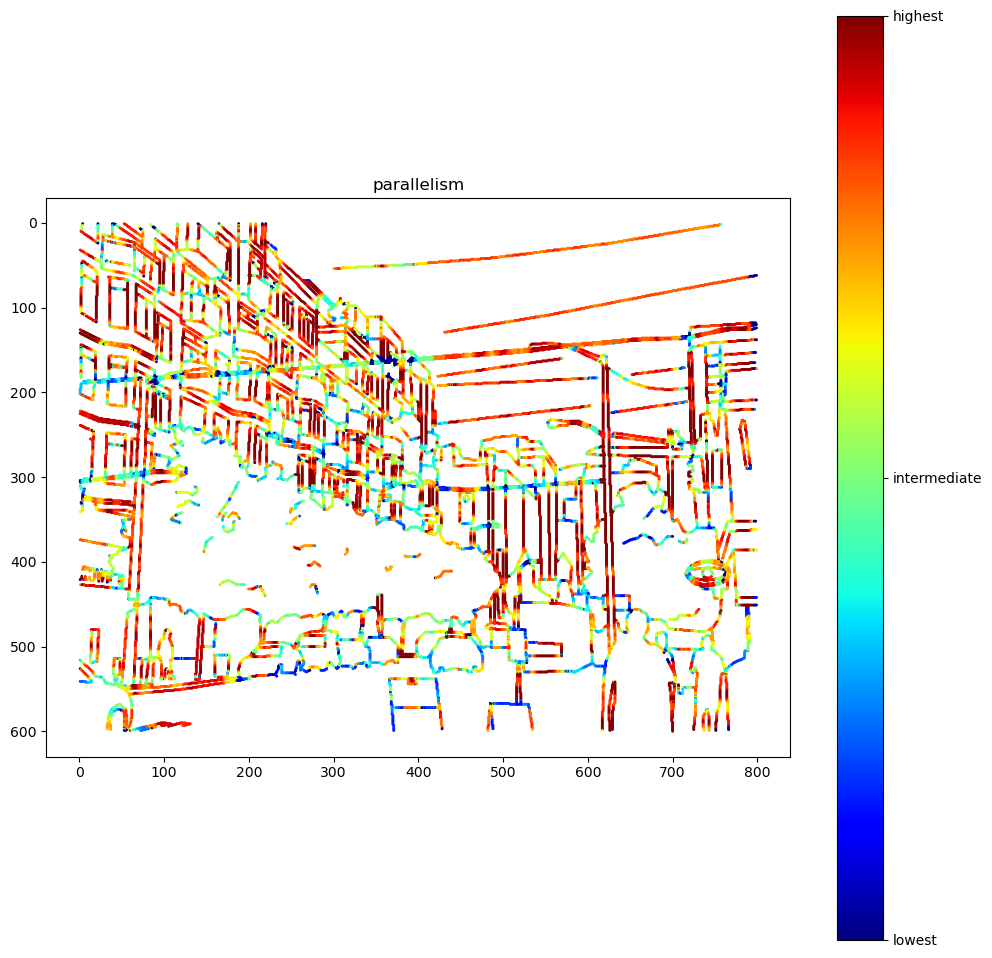

separation


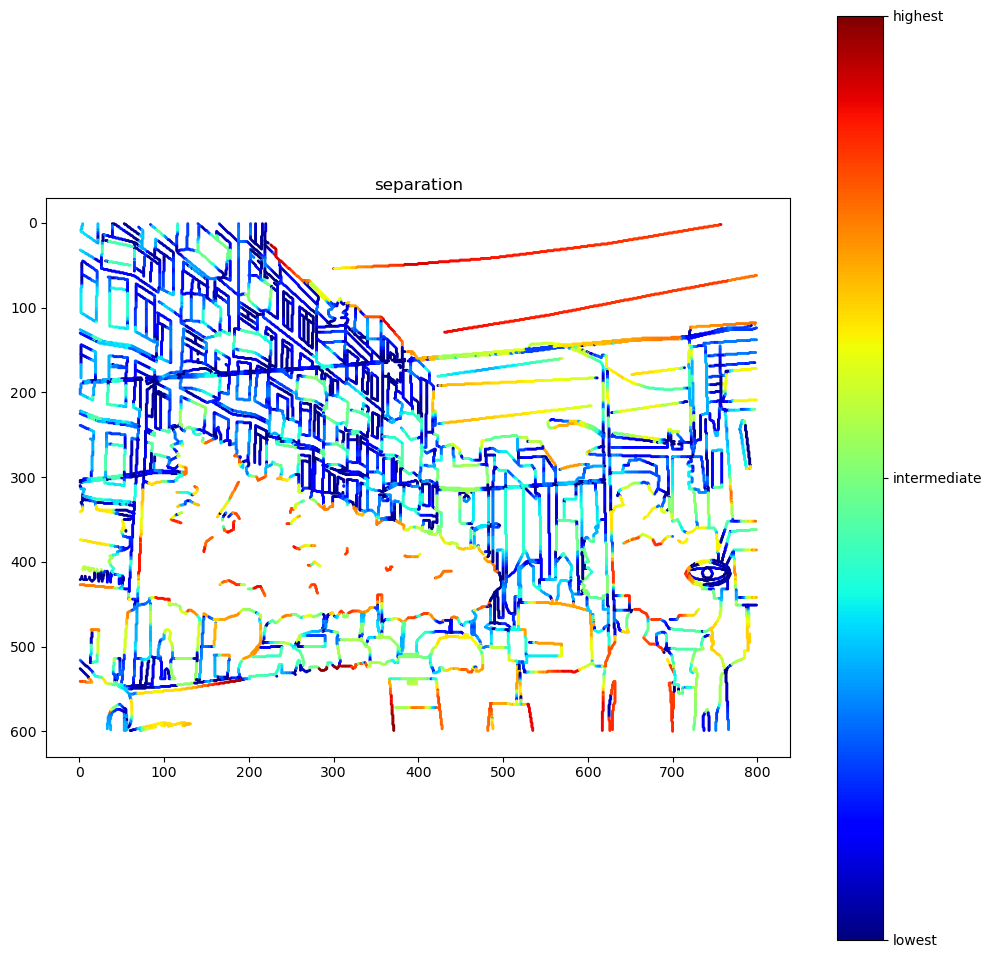

mirror


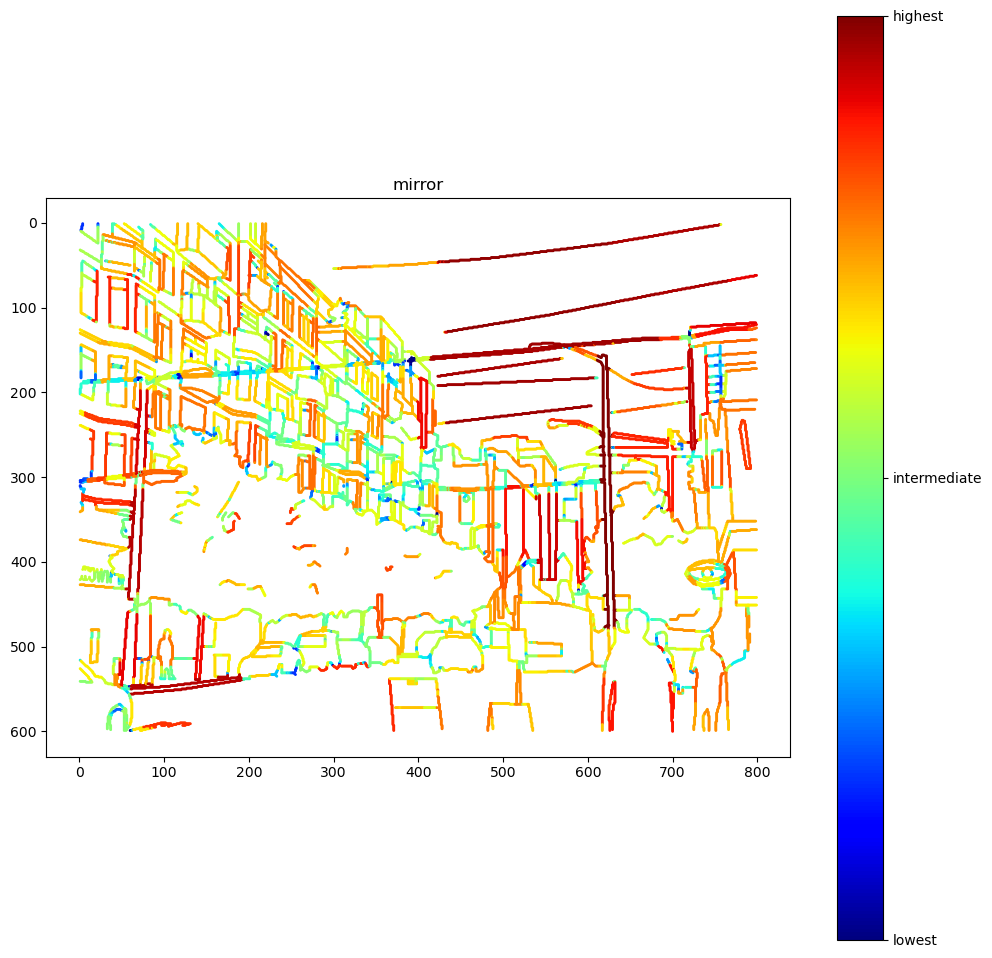

In [18]:
drawAllProperties(temp_ld, 'subplot', ['parallelism', 'separation', 'mirror'])

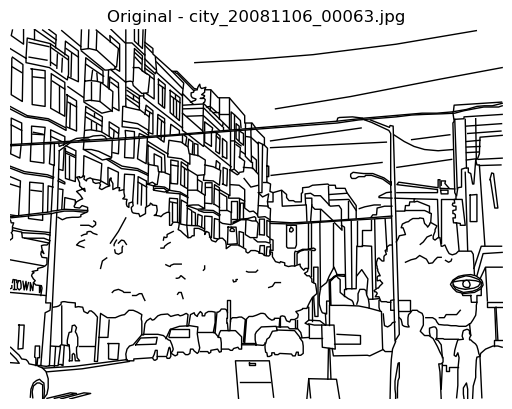

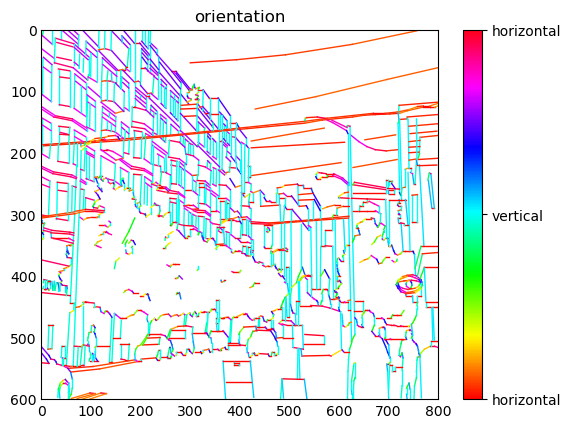

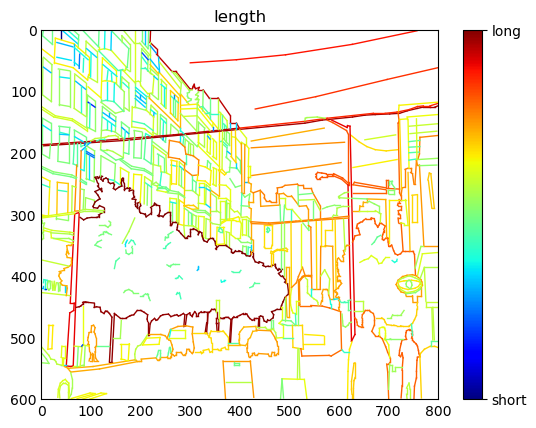

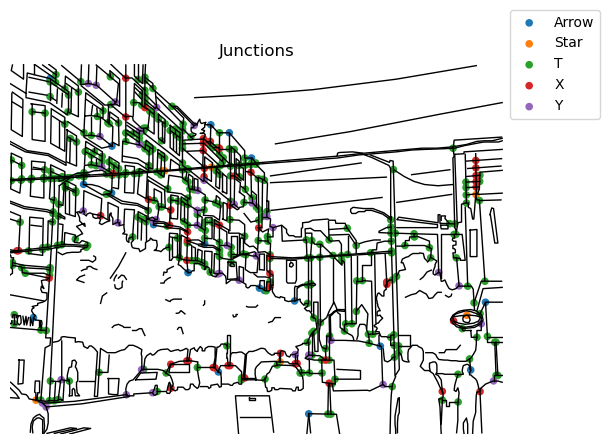

mirror


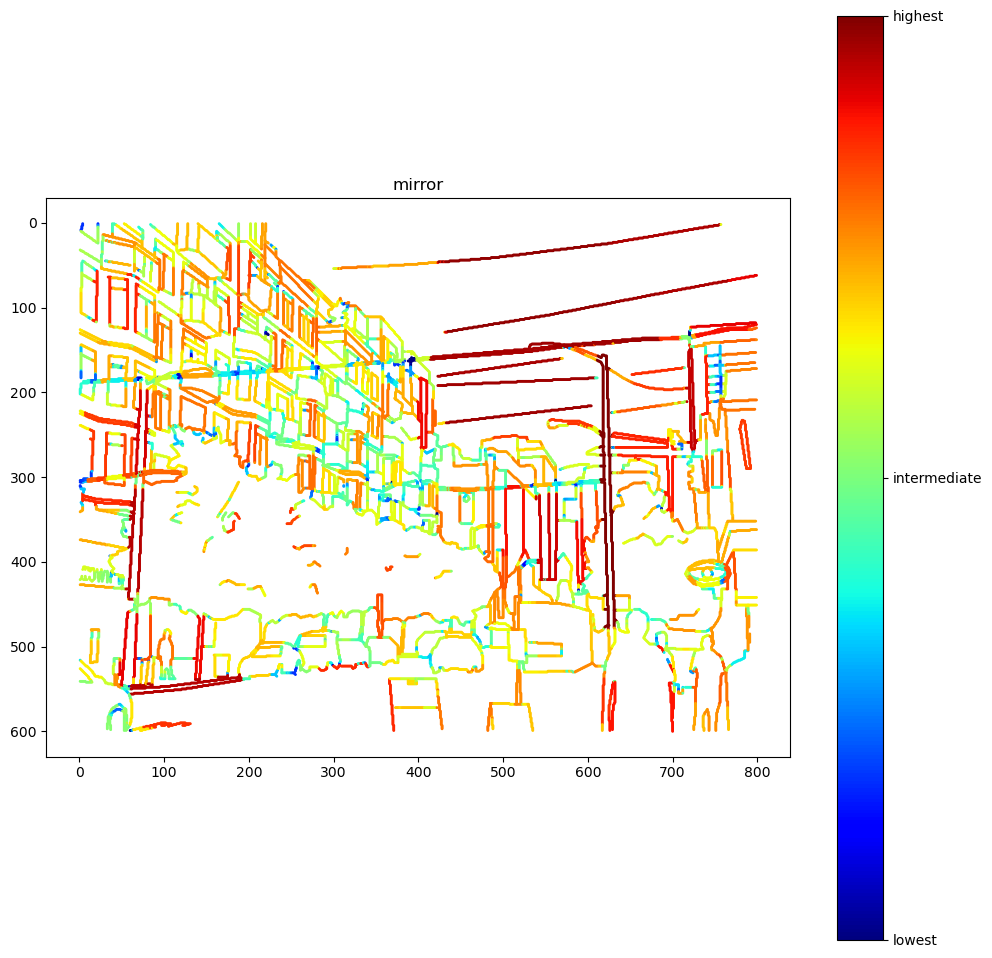

parallelism


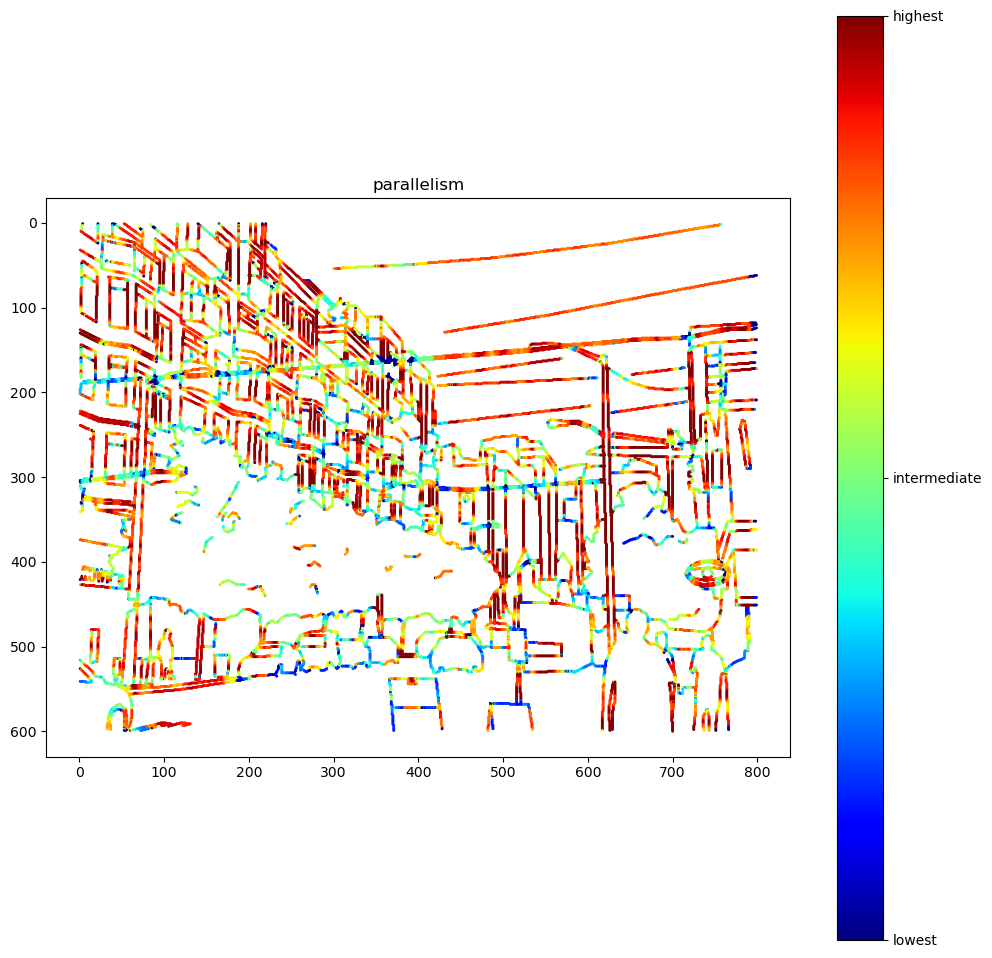

separation


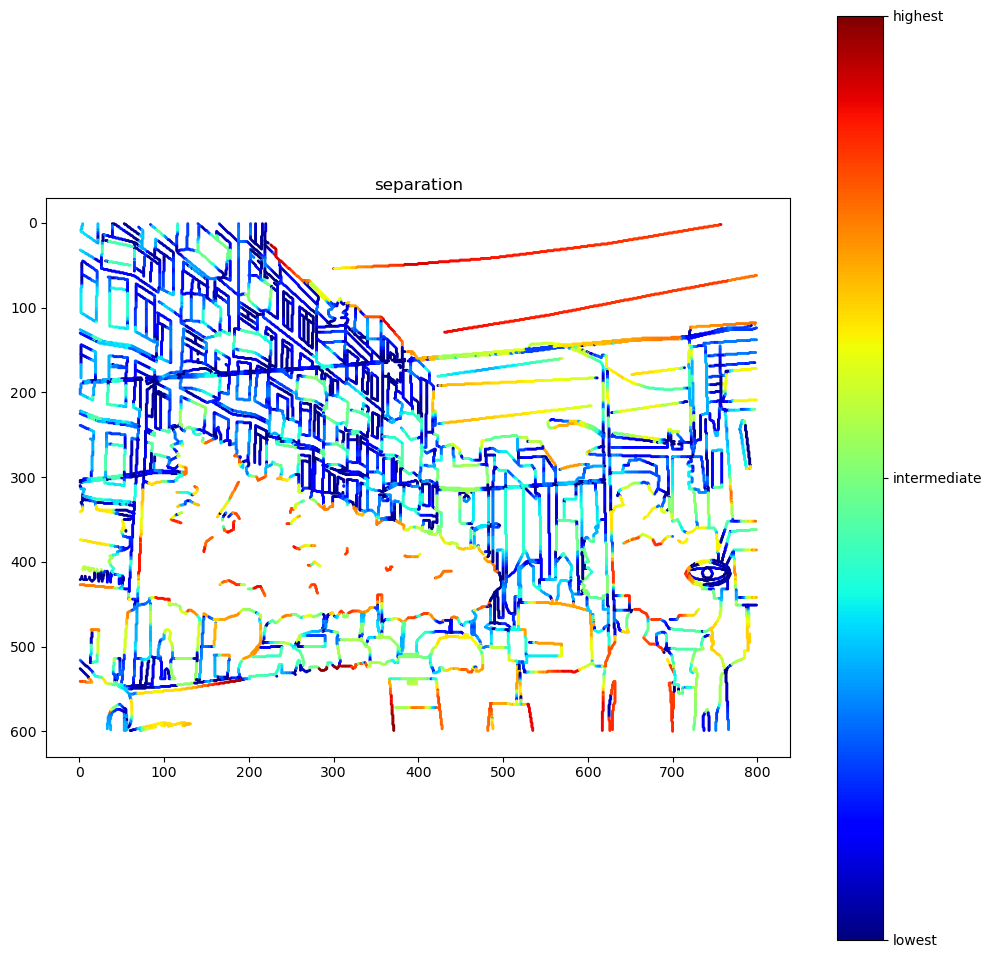

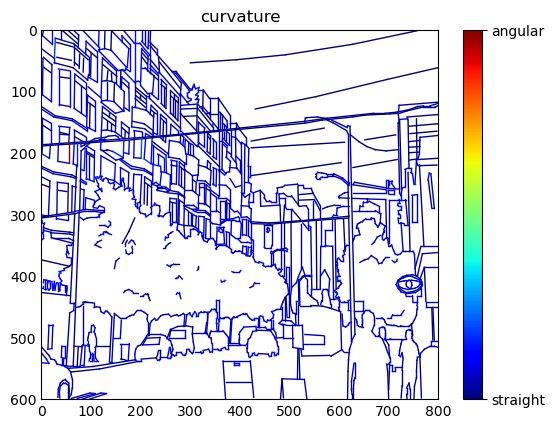

In [19]:
drawAllProperties(temp_ld, 'subplot', ['original','orientation','length','junctions',
                                    'mirror','parallelism','separation', 'curvature'])

# Stats calculation

In [20]:
# Get a copy of cute 
temp_cute = cute.copy()

In [21]:
from MLVcode.getOrientationStats import getOrientationStats
from MLVcode.getLengthStats import getLengthStats
from MLVcode.getCurvatureStats import getCurvatureStats
from MLVcode.getHorizontalVerticalStats import getHorizontalVerticalStats
from MLVcode.getJunctionStats import getJunctionStats
from MLVcode.getContourPropertiesStats import getContourPropertiesStats

In [22]:
temp = [[1, 324], [2, 3], [3, 4], [20, 252]]
# Convert them to a 1D list
temp = [item for sublist in temp for item in sublist]
for c in np.unique(temp):
    print(c)

1
2
3
4
20
252
324


In [32]:
temp_cute,histograms,bins,statsNames = getContourPropertiesStats(temp_cute, whichStats=['curvature','length','orientation','junctions'])

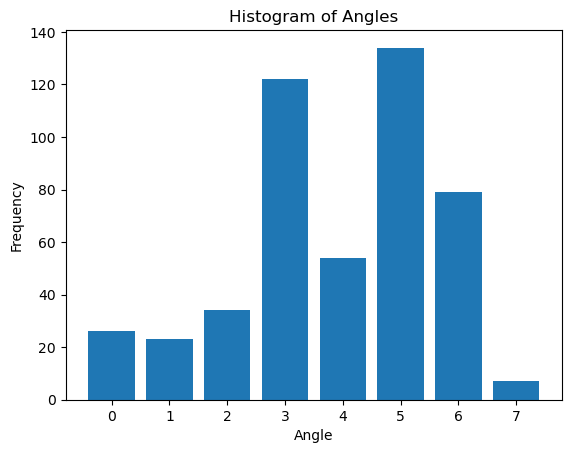

In [33]:
angles = []
for i in range(len(temp_cute['junctions'])):
    angles.append(temp_cute['junctions'][i]['minAngle'])
angleHist, _ = np.histogram(angles, bins=8)
# Plot the histogram
plt.figure()
plt.bar(np.arange(8), angleHist)
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.show()

In [34]:
# Get contour properties histograms
# cute,histograms,bins,statsNames = getContourPropertiesStats(cute)

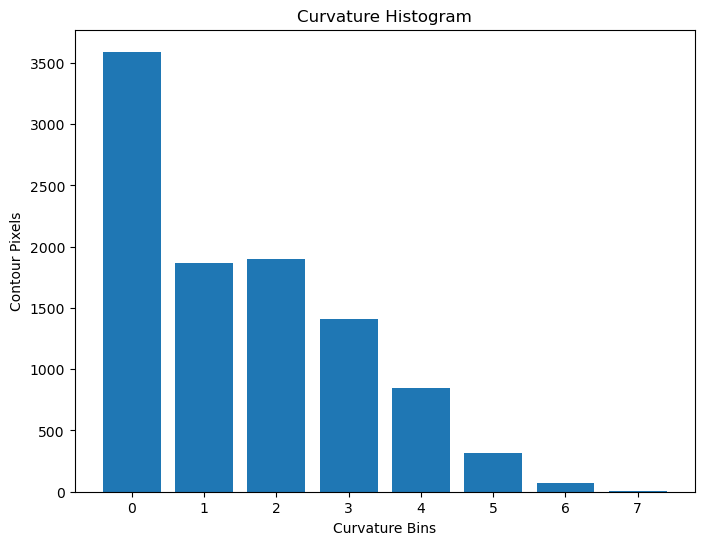

In [35]:
# Plot histogram of cute['normSumCurvatureHistogram'] using plot
plt.figure(figsize=(8,6))
plt.bar(range(len(temp_cute['normSumCurvatureHistogram'])), temp_cute['normSumCurvatureHistogram'])
plt.title('Curvature Histogram')
plt.xlabel('Curvature Bins')
plt.ylabel('Contour Pixels')
plt.show()

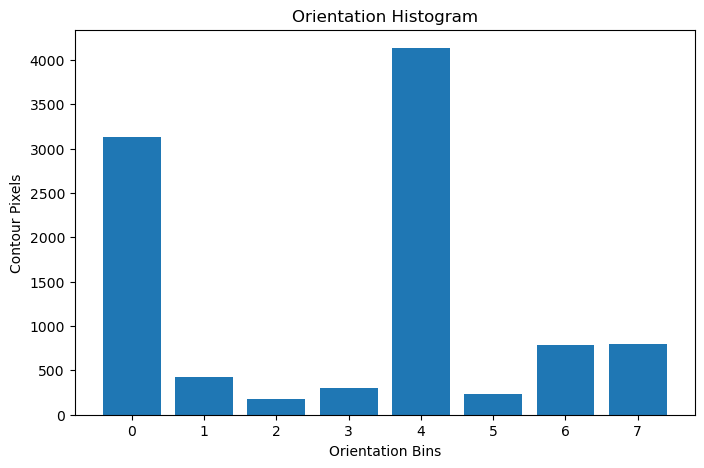

In [36]:
plt.figure(figsize=(8,5))
plt.bar(range(len(temp_cute['normSumOrientationHistogram'])), temp_cute['normSumOrientationHistogram'])
plt.title('Orientation Histogram')
plt.xlabel('Orientation Bins')
plt.ylabel('Contour Pixels')
plt.show()

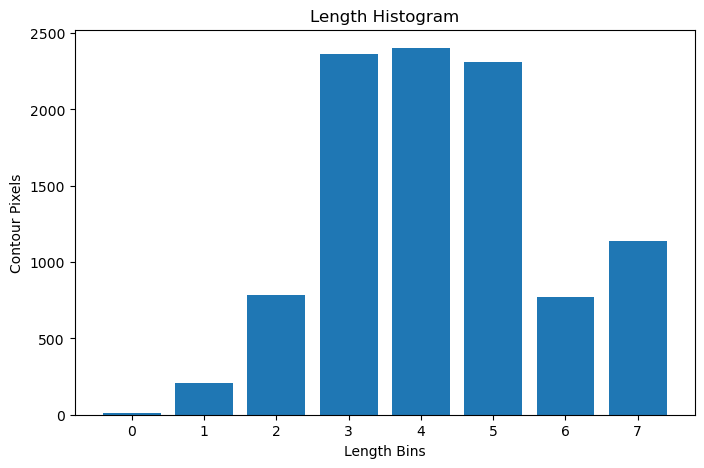

In [37]:
plt.figure(figsize=(8,5))
plt.bar(range(len(temp_cute['normSumLengthHistogram'])), temp_cute['normSumLengthHistogram'])
plt.title('Length Histogram')
plt.xlabel('Length Bins')
plt.ylabel('Contour Pixels')
plt.show()

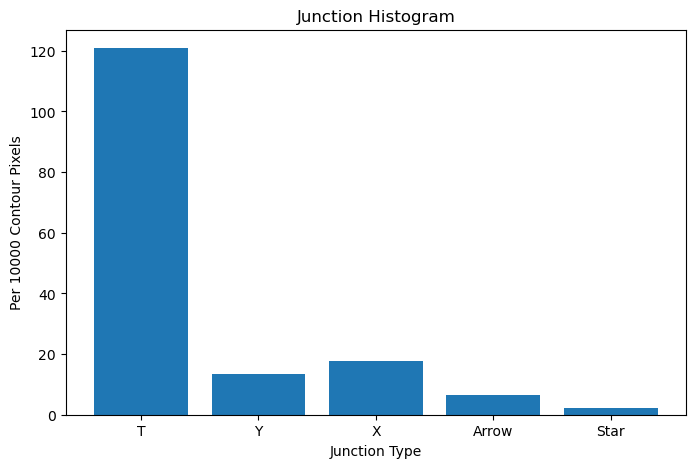

In [38]:
plt.figure(figsize=(8,5))
plt.bar(range(len(temp_cute['normJunctionTypeHistogram'])), temp_cute['normJunctionTypeHistogram'])
plt.title('Junction Histogram')
plt.xlabel('Junction Type')
plt.xticks(range(len(temp_cute['junctionTypeBins'])), temp_cute['junctionTypeBins'])
plt.ylabel('Per 10000 Contour Pixels')
plt.show()

## Split functions

In [39]:
from MLVcode.splitLDbyProperties import splitLDbyProperties

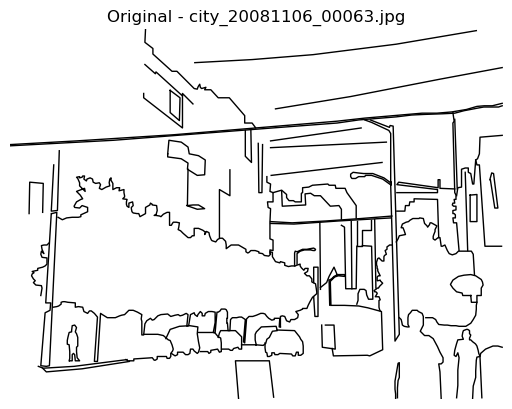

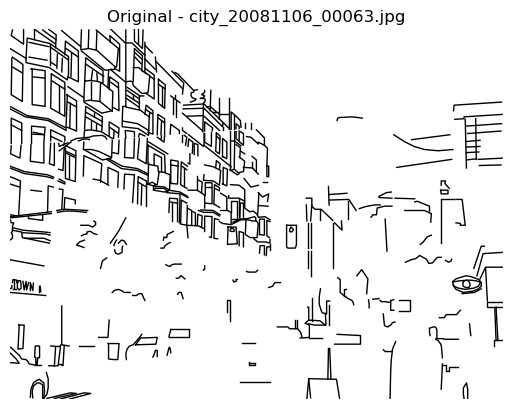

In [40]:
# Split image into two versions based on selected properties
# Split image by curvature and orientation (50% proportion of pixels)
top,bottom = splitLDbyProperties(temp_cute,['length'])
drawLinedrawing(top)
drawLinedrawing(bottom)

Top:
Bottom:


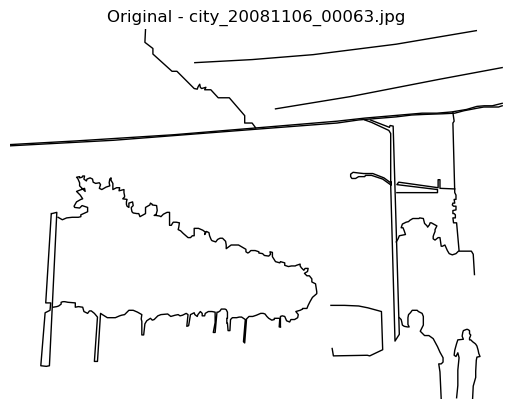

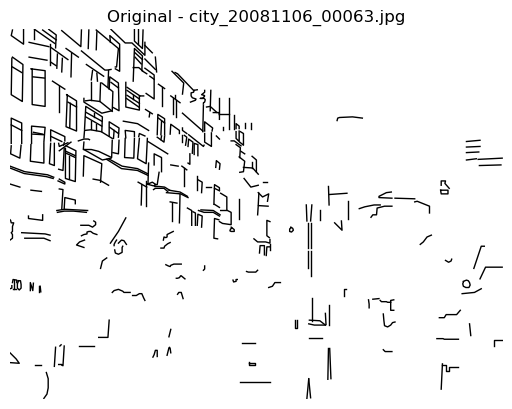

In [41]:
top, bottom = splitLDbyProperties(temp_cute, ['length'], 0.25)
print("Top:")
drawLinedrawing(top)
print("Bottom:")
drawLinedrawing(bottom)

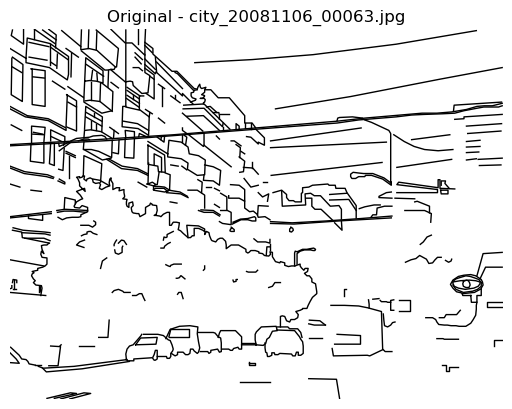

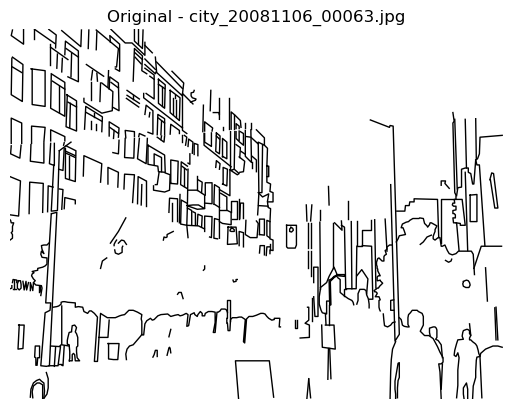

In [34]:
top, bottom = splitLDbyProperties(cute, ['orientation'],fraction=0.550)
drawLinedrawing(top)
drawLinedrawing(bottom)

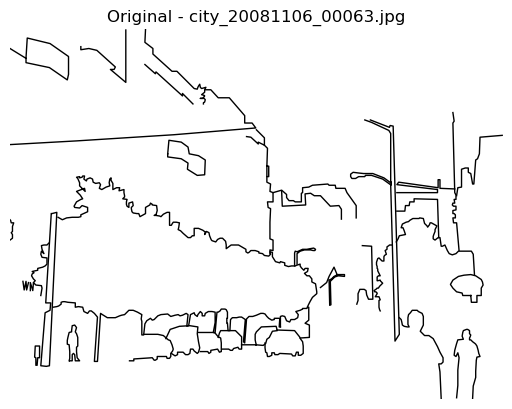

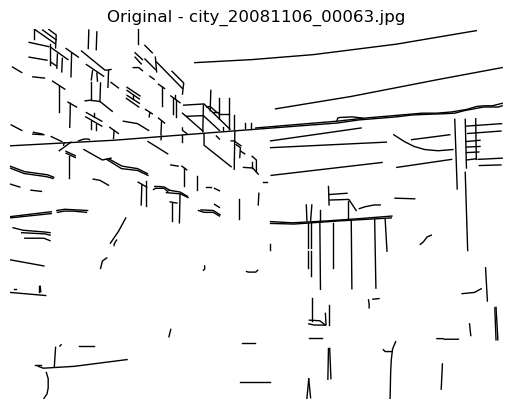

In [44]:
# THere is some error which comes when I type 0.15. Check that later
top, bottom = splitLDbyProperties(temp_cute, ['curvature'],fraction=0.30)
drawLinedrawing(top)
drawLinedrawing(bottom)